In [ ]:
# 1- Podemos predecir el tiempo de supervivencia de un paciente?
# 2- Podemos predecir si es largo o corto superviviente?
# 3- Existen diferentes grupos de pacientes? 

In [1]:
import csv
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

data_path='Integracion_metabase_pulmon_2024_02_05_CIM 3_SVM.csv'
data = pd.read_csv(data_path)

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

for i in data.index:
    if data["Tiempo Sobrevida"][i]<=24:
        data["Tiempo Sobrevida"][i]="Corto"
    else:
        data["Tiempo Sobrevida"][i]="Largo"

label_encoder = LabelEncoder()
data["Tiempo Sobrevida"] = label_encoder.fit_transform(data["Tiempo Sobrevida"])

In [3]:
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data=data, columns=['Ecog Inicial',"Metastasis cerebral","Sexo","Estadio","Quimioterapia Previa Inclusion","Radioterapia Previa Inclusion","Tratamiento Asignado"], prefix='ohe')

In [4]:
data

,Edad,Tiempo Sobrevida,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,ohe_0,...,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si,ohe_CIMAVaxEGF,ohe_CIMAvaxEGF,ohe_Control,ohe_Racotumomab
0,71,0,75.00,17.00,4.41,72.53,4.0,75.0,320.0,False,...,True,False,False,True,True,False,False,False,True,False
1,37,0,74.00,19.00,3.89,72.66,6.0,5.3,283.0,False,...,False,True,False,True,True,False,False,False,True,False
2,64,0,80.00,16.00,5.00,28.20,4.0,8.7,141.0,False,...,False,True,False,True,True,False,False,False,True,False
3,60,0,72.00,16.00,4.50,78.44,4.0,11.9,353.0,False,...,False,True,False,True,True,False,True,False,False,False
4,69,0,0.66,0.32,2.06,87.27,0.0,4.5,180.0,False,...,False,True,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,52,0,56.00,36.00,1.56,196.71,7.0,4.0,306.0,False,...,True,False,False,True,True,False,False,False,True,False
1286,70,0,59.00,41.00,1.44,104.24,0.0,8.6,150.0,False,...,True,False,False,True,True,False,True,False,False,False
1287,75,0,75.00,19.00,3.95,76.00,1.0,0.0,300.0,False,...,False,False,False,True,False,True,True,False,False,False
1288,65,0,56.00,40.00,1.40,214.29,2.0,0.0,300.0,False,...,True,False,False,True,False,True,True,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X=data
y=data.pop("Tiempo Sobrevida")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [6]:
#Modelo regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)
y_prob = y_prob[:, 1]
cm_reg = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy_reg = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_reg)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       330
           1       0.00      0.00      0.00        57

    accuracy                           0.84       387
   macro avg       0.43      0.50      0.46       387
weighted avg       0.73      0.84      0.78       387

Accuracy: 0.8449612403100775


ROC AUC= 0.4954545454545455


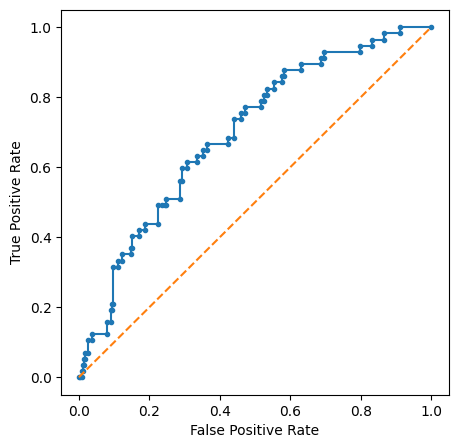

In [7]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=', clf_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [8]:
# A decision tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics 

clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy_tree = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_tree)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       330
           1       0.43      0.11      0.17        57

    accuracy                           0.85       387
   macro avg       0.65      0.54      0.54       387
weighted avg       0.80      0.85      0.81       387

Accuracy: 0.8475452196382429


ROC AUC= 0.5405103668261563


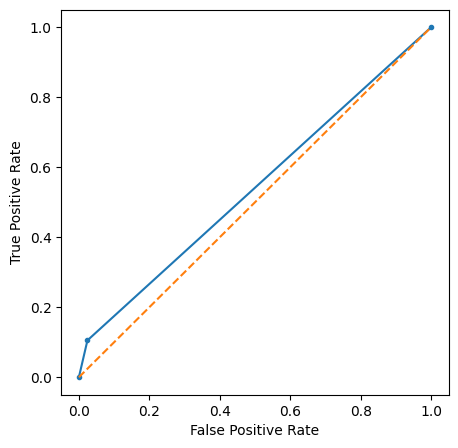

In [9]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=', clf_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Profundidad del árbol: 4
Número de nodos terminales: 14


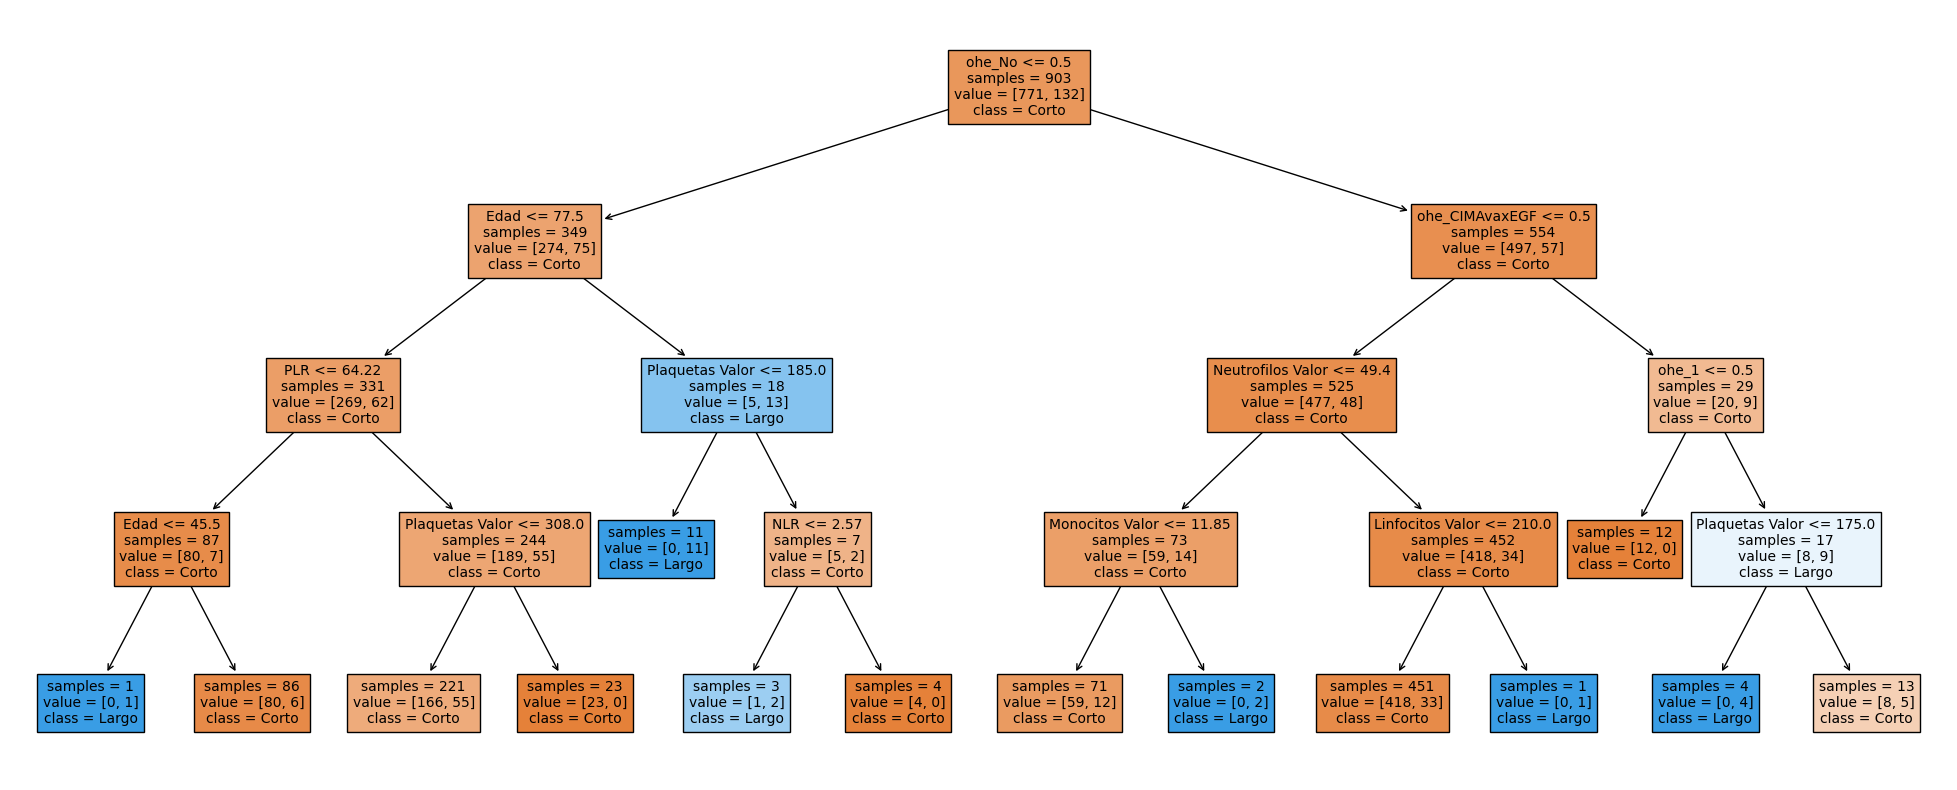

In [10]:
from sklearn.tree import plot_tree
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(25, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = data.columns,
            class_names   = ["Corto", "Largo"],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True, criterion = 'squared_error', max_features = 1, n_jobs = -1)
            
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      oob_score=True, random_state=0)

In [12]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

ROC AUC= 0.594976076555024


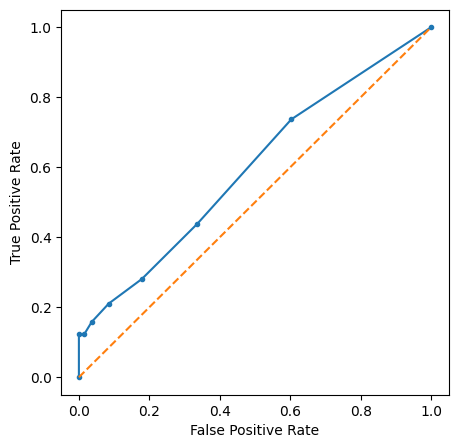

In [13]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_auc = roc_auc_score(y_test, predictions)

print('ROC AUC=', clf_auc)

fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
#Normalizacion de los datos

data_path='Integracion_metabase_pulmon_2024_02_05_CIM 3_SVM.csv'
data = pd.read_csv(data_path)

In [15]:
y=data["Tiempo Sobrevida"]

c=''
for i in range(len(y)):
    if y[i] >= 24:
        y[i]='Largo'
        c+='r'
    else:
        y[i]='Corto'
        c+='b'

y=pd.DataFrame(y)

In [16]:
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data=data, columns=['Ecog Inicial',"Metastasis cerebral","Sexo","Estadio","Quimioterapia Previa Inclusion","Radioterapia Previa Inclusion","Tratamiento Asignado"], prefix='ohe')

In [17]:
data

,Edad,Tiempo Sobrevida,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,ohe_0,...,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si,ohe_CIMAVaxEGF,ohe_CIMAvaxEGF,ohe_Control,ohe_Racotumomab
0,71,Corto,75.00,17.00,4.41,72.53,4.0,75.0,320.0,False,...,True,False,False,True,True,False,False,False,True,False
1,37,Corto,74.00,19.00,3.89,72.66,6.0,5.3,283.0,False,...,False,True,False,True,True,False,False,False,True,False
2,64,Corto,80.00,16.00,5.00,28.20,4.0,8.7,141.0,False,...,False,True,False,True,True,False,False,False,True,False
3,60,Corto,72.00,16.00,4.50,78.44,4.0,11.9,353.0,False,...,False,True,False,True,True,False,True,False,False,False
4,69,Corto,0.66,0.32,2.06,87.27,0.0,4.5,180.0,False,...,False,True,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,52,Corto,56.00,36.00,1.56,196.71,7.0,4.0,306.0,False,...,True,False,False,True,True,False,False,False,True,False
1286,70,Corto,59.00,41.00,1.44,104.24,0.0,8.6,150.0,False,...,True,False,False,True,True,False,True,False,False,False
1287,75,Corto,75.00,19.00,3.95,76.00,1.0,0.0,300.0,False,...,False,False,False,True,False,True,True,False,False,False
1288,65,Corto,56.00,40.00,1.40,214.29,2.0,0.0,300.0,False,...,True,False,False,True,False,True,True,False,False,False


In [18]:
X_categorical = data.select_dtypes(include=['object','bool']).apply(label_encoder.fit_transform) 
X_numerical = data.select_dtypes(exclude=['object','bool']).apply(label_encoder.fit_transform)


In [19]:
X_numerical


,Edad,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor
0,36,107,48,273,302,19,93,158
1,2,106,54,253,303,29,19,134
2,29,119,46,291,45,19,50,14
3,25,103,46,276,337,19,71,175
4,34,14,13,132,403,0,12,41
...,...,...,...,...,...,...,...,...
1285,17,67,93,95,917,35,10,149
1286,35,71,100,84,534,0,49,18
1287,40,107,54,255,321,11,0,145
1288,30,67,98,80,943,13,0,145


In [20]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
columns=X_numerical.columns
columns=columns.tolist()

data = pd.DataFrame(scaler.fit_transform(X_numerical),columns=columns)
data = pd.concat([data,X_categorical],axis=1)

In [21]:
data

,Edad,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,Tiempo Sobrevida,ohe_0,...,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si,ohe_CIMAVaxEGF,ohe_CIMAvaxEGF,ohe_Control,ohe_Racotumomab
0,0.731336,0.859937,-1.102103,1.275073,-0.743606,0.730082,2.308602,1.386507,0,0,...,1,0,0,1,1,0,0,0,1,0
1,-2.769690,0.821675,-0.869455,1.049738,-0.740245,1.498903,-0.127334,0.921766,0,0,...,0,1,0,1,1,0,0,0,1,0
2,0.010537,1.319093,-1.179653,1.477874,-1.607359,0.730082,0.893126,-1.401938,0,0,...,0,1,0,1,1,0,0,0,1,0
3,-0.401349,0.706886,-1.179653,1.308873,-0.625975,0.730082,1.584405,1.715699,0,0,...,0,1,0,1,1,0,1,0,0,0
4,0.525393,-2.698516,-2.459218,-0.313539,-0.404155,-0.730678,-0.357761,-0.879105,0,0,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-1.225120,-0.670580,0.642758,-0.730409,1.323349,1.960195,-0.423597,1.212229,0,0,...,1,0,0,1,1,0,0,0,1,0
1286,0.628365,-0.517529,0.914181,-0.854343,0.036123,-0.730678,0.860208,-1.324482,0,0,...,1,0,0,1,1,0,1,0,0,0
1287,1.143222,0.859937,-0.869455,1.072271,-0.679749,0.115025,-0.752777,1.134772,0,0,...,0,0,0,1,0,1,1,0,0,0
1288,0.113508,-0.670580,0.836632,-0.899410,1.410733,0.268789,-0.752777,1.134772,0,0,...,1,0,0,1,0,1,1,0,0,0


In [22]:
X=data
y=data.pop("Tiempo Sobrevida")

In [23]:
#Modelo SVM
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

clf1 = SVC(kernel="linear")
clf1.fit(X_train,y_train)

y_pred= clf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       330
           1       0.00      0.00      0.00        57

    accuracy                           0.85       387
   macro avg       0.43      0.50      0.46       387
weighted avg       0.73      0.85      0.78       387

Accuracy: 0.8527131782945736


ROC AUC= 0.5


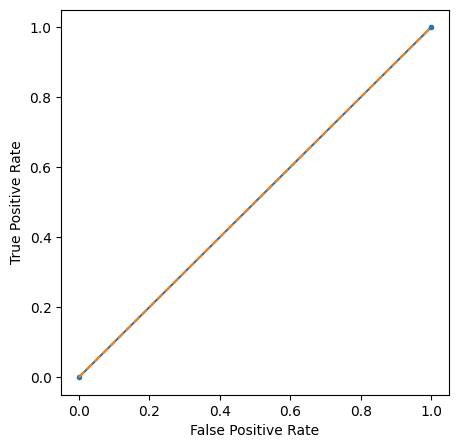

In [24]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=', clf_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [25]:
# A KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy_knn = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       330
           1       0.44      0.19      0.27        57

    accuracy                           0.84       387
   macro avg       0.66      0.58      0.59       387
weighted avg       0.81      0.84      0.82       387

Accuracy: 0.8527131782945736


In [26]:
accuracies = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append([k, accuracy])

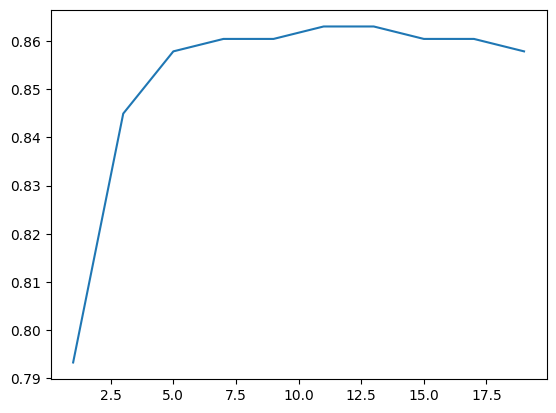

In [27]:
to_show = pd.DataFrame(accuracies, columns=['k', 'accuracy'])
plt.plot(to_show.k, to_show.accuracy)
plt.show()

In [28]:
max = np.max(to_show['accuracy'])
L = to_show['accuracy'].tolist()
n_neighbors = accuracies[L.index(max)][0]

In [29]:
n_neighbors

11

In [35]:
#Create the KNN
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the classifier
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       330
           1       0.70      0.12      0.21        57

    accuracy                           0.86       387
   macro avg       0.78      0.56      0.57       387
weighted avg       0.84      0.86      0.82       387

Accuracy: 0.8630490956072352


ROC AUC= 0.5568580542264753


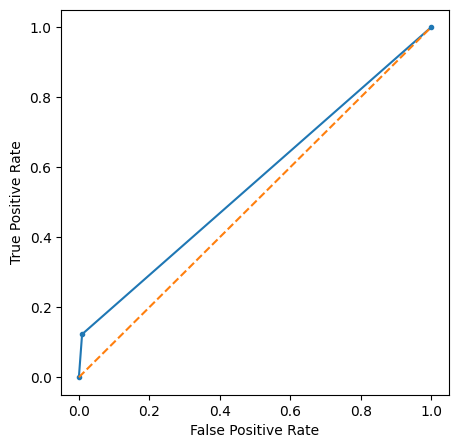

In [36]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC=', clf_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
def show_confusion_matrix(m, classes, figsize=(4,4), ax=None, title=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    if title is None:
        Title = "Confusion Matrix"

    # Plot the confusion matrix
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)

    # Add labels to each cell in the matrix
    thresh = m.max() / 2.
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            ax.text(j, i, m[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from functools import partial
show_cm = partial(show_confusion_matrix, classes=['Corto', 'Largo'])

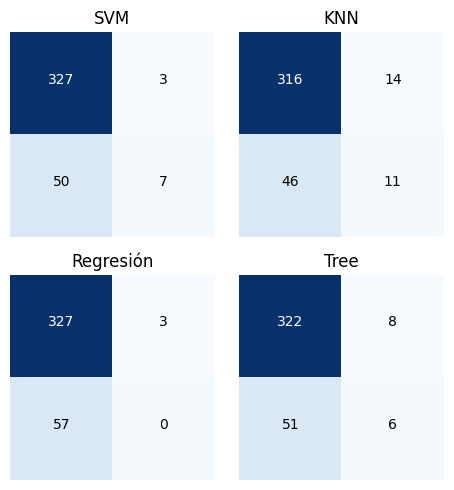

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
show_cm(cm, ax=axes[0, 0], title="SVM")
show_cm(cm_tree, ax=axes[1, 1], title="Tree")
show_cm(cm_knn, ax=axes[0, 1], title="KNN")
show_cm(cm_reg, ax=axes[1, 0], title="Regresión")
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

In [40]:
accuracys=pd.DataFrame([accuracy,accuracy_knn,accuracy_reg,accuracy_tree],columns=["Accuracy"])
accuracys.index = ['SVM','KNN','RL','DT']
accuracys

,Accuracy
SVM,0.863049
KNN,0.844961
RL,0.844961
DT,0.847545


In [41]:
data

,Edad,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,ohe_0,ohe_1,...,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si,ohe_CIMAVaxEGF,ohe_CIMAvaxEGF,ohe_Control,ohe_Racotumomab
0,0.731336,0.859937,-1.102103,1.275073,-0.743606,0.730082,2.308602,1.386507,0,1,...,1,0,0,1,1,0,0,0,1,0
1,-2.769690,0.821675,-0.869455,1.049738,-0.740245,1.498903,-0.127334,0.921766,0,0,...,0,1,0,1,1,0,0,0,1,0
2,0.010537,1.319093,-1.179653,1.477874,-1.607359,0.730082,0.893126,-1.401938,0,1,...,0,1,0,1,1,0,0,0,1,0
3,-0.401349,0.706886,-1.179653,1.308873,-0.625975,0.730082,1.584405,1.715699,0,1,...,0,1,0,1,1,0,1,0,0,0
4,0.525393,-2.698516,-2.459218,-0.313539,-0.404155,-0.730678,-0.357761,-0.879105,0,1,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-1.225120,-0.670580,0.642758,-0.730409,1.323349,1.960195,-0.423597,1.212229,0,1,...,1,0,0,1,1,0,0,0,1,0
1286,0.628365,-0.517529,0.914181,-0.854343,0.036123,-0.730678,0.860208,-1.324482,0,0,...,1,0,0,1,1,0,1,0,0,0
1287,1.143222,0.859937,-0.869455,1.072271,-0.679749,0.115025,-0.752777,1.134772,0,1,...,0,0,0,1,0,1,1,0,0,0
1288,0.113508,-0.670580,0.836632,-0.899410,1.410733,0.268789,-0.752777,1.134772,0,1,...,1,0,0,1,0,1,1,0,0,0


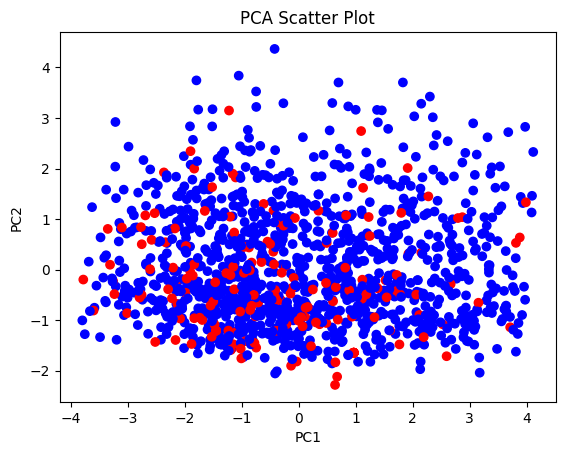

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Select the number of components you want to keep
principal_components = pca.fit_transform(pd.concat([data,y],axis=1))

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1','PC2'])

# Plot the data in a 2D scatter plot
plt.scatter(principal_df['PC1'],principal_df['PC2'],c=[*c])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')

plt.show()

In [43]:
c1=X_categorical.columns
columns=columns+c1.tolist()
pd.DataFrame(  data = pca.components_,
    columns=columns,
    index   = ['PC1', 'PC2'])

,Edad,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,Tiempo Sobrevida,ohe_0,...,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si,ohe_CIMAVaxEGF,ohe_CIMAvaxEGF,ohe_Control,ohe_Racotumomab
PC1,-0.016070,0.454814,-0.457778,0.546918,-0.511110,0.116838,0.075091,0.041302,-0.013129,-0.000543,...,0.003824,0.006593,-0.006593,-0.024085,0.024085,0.009424,-0.005975,0.002882,-0.006331,-0.013929
PC2,-0.072737,-0.097749,-0.152937,0.069004,0.289848,0.496764,-0.040640,0.763038,0.023723,-0.019282,...,0.102042,0.000448,-0.000448,0.088476,-0.088476,0.063023,-0.014171,-0.026094,-0.022758,-0.038629


In [44]:
pca.explained_variance_ratio_

array([0.29693133, 0.12087253])

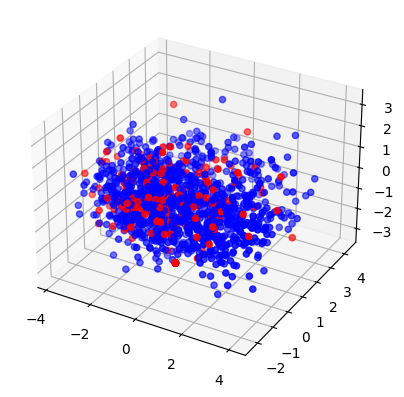

In [45]:
pca_1 = PCA(n_components=3)  # Select the number of components you want to keep
principal_components = pca_1.fit_transform(pd.concat([data,y],axis=1))

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1','PC2','PC3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
ax.scatter(principal_df['PC1'],principal_df['PC2'],principal_df['PC3'], c=[*c])
plt.show()

In [46]:
pca_1.explained_variance_ratio_

array([0.29693133, 0.12087253, 0.09985517])

In [47]:
pd.DataFrame(  data = pca_1.components_,
    columns=columns,
    index   = ['PC1', 'PC2','PC3'])

,Edad,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,Tiempo Sobrevida,ohe_0,...,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si,ohe_CIMAVaxEGF,ohe_CIMAvaxEGF,ohe_Control,ohe_Racotumomab
PC1,-0.016070,0.454814,-0.457778,0.546918,-0.511110,0.116838,0.075091,0.041302,-0.013129,-0.000543,...,0.003824,0.006593,-0.006593,-0.024085,0.024085,0.009424,-0.005975,0.002882,-0.006331,-0.013929
PC2,-0.072737,-0.097749,-0.152937,0.069004,0.289848,0.496764,-0.040640,0.763038,0.023723,-0.019282,...,0.102042,0.000448,-0.000448,0.088476,-0.088476,0.063023,-0.014171,-0.026094,-0.022758,-0.038629
PC3,-0.822860,-0.063521,0.032196,-0.043788,-0.011804,0.207564,0.392296,-0.132171,0.075155,-0.007346,...,-0.044909,-0.110058,0.110058,-0.120079,0.120079,-0.141558,0.028456,0.076910,0.036192,0.028255


In [48]:
data = pd.concat([data,X_categorical],axis=1)
y=data.pop('Tiempo Sobrevida')
x=data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

X_train= pd.DataFrame(pca.fit_transform(X_train),columns=['PC1', 'PC2'])
X_test= pd.DataFrame(pca.fit_transform(X_test),columns=['PC1', 'PC2'])

In [50]:
from sklearn.metrics import accuracy_score

# Create the SVM classifier
clf = SVC(kernel="rbf")

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       332
           1       0.00      0.00      0.00        55

    accuracy                           0.86       387
   macro avg       0.43      0.50      0.46       387
weighted avg       0.74      0.86      0.79       387

Accuracy: 0.8578811369509044


Text(0.5, 1.0, 'Resultados clasificación SVM radial')

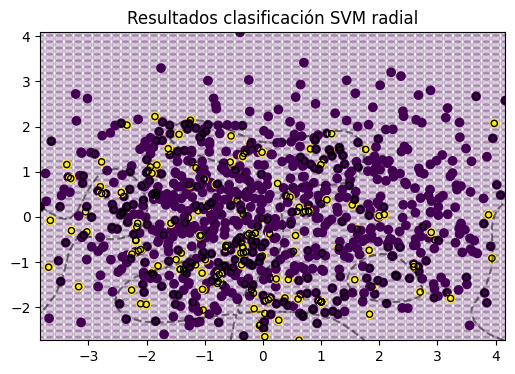

In [51]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x_ = np.linspace(np.min(X_train.PC1), np.max(X_train.PC1), 50)
y_ = np.linspace(np.min(X_train.PC2), np.max(X_train.PC2), 50)
Y, X = np.meshgrid(y_ , x_)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = clf.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.PC1, X_train.PC2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=20, linewidth=1,
    facecolors='none', edgecolors='black'
)


# Hiperplano de separación
ax.contour(
    X,
    Y,
    clf.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM radial")

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

X_train= pd.DataFrame(pca_1.fit_transform(X_train),columns=['PC1', 'PC2','PC3'])
X_test= pd.DataFrame(pca_1.fit_transform(X_test),columns=['PC1', 'PC2','PC3'])

In [53]:
# Create the SVM classifier
clf = SVC(kernel='rbf')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       332
           1       0.00      0.00      0.00        55

    accuracy                           0.86       387
   macro avg       0.43      0.50      0.46       387
weighted avg       0.74      0.86      0.79       387

Accuracy: 0.8578811369509044


In [54]:
##intenar 3D

In [55]:
# A KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

Accuracy: 0.8527131782945736
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       332
           1       0.25      0.02      0.03        55

    accuracy                           0.85       387
   macro avg       0.55      0.50      0.48       387
weighted avg       0.77      0.85      0.79       387



In [56]:
#Decision tree (largos,cortos) cada tratamiento por separado
#El analisis con el tratamiento de nimotuzumab no se pudo realizar por missing en los datos

In [57]:
data_path='Integracion_metabase_pulmon_2024_02_05_CIM 3_SVM.csv'
data = pd.read_csv(data_path)

In [58]:
raco = data.loc[data["Tratamiento Asignado"]=="Racotumomab"]
raco =  pd.get_dummies(data=raco, columns=["Tratamiento Asignado",'Ecog Inicial',"Metastasis cerebral","Sexo","Estadio","Quimioterapia Previa Inclusion","Radioterapia Previa Inclusion"], prefix='ohe')
control = data.loc[data["Tratamiento Asignado"]=="Control"]
control =  pd.get_dummies(data=control, columns=["Tratamiento Asignado",'Ecog Inicial',"Metastasis cerebral","Sexo","Estadio","Quimioterapia Previa Inclusion","Radioterapia Previa Inclusion"], prefix='ohe')
cima = data.loc[data["Tratamiento Asignado"]=="CIMAVaxEGF"]
cima =  pd.get_dummies(data=cima, columns=["Tratamiento Asignado",'Ecog Inicial',"Metastasis cerebral","Sexo","Estadio","Quimioterapia Previa Inclusion","Radioterapia Previa Inclusion"], prefix='ohe')

In [59]:
control

,Edad,Tiempo Sobrevida,Neutrofilos Valor,Linfocitos Valor,NLR,PLR,Monocitos Valor,Leucocitos Valor,Plaquetas Valor,ohe_Control,...,ohe_3,ohe_No,ohe_Femenino,ohe_Masculino,ohe_IIIB,ohe_IV,ohe_No,ohe_Si,ohe_No,ohe_Si
0,71,1.37,75.0,17.0,4.41,72.53,4.0,75.0,320.0,True,...,False,True,False,True,True,False,False,True,True,False
1,37,2.73,74.0,19.0,3.89,72.66,6.0,5.3,283.0,True,...,False,True,False,True,False,True,False,True,True,False
2,64,1.57,80.0,16.0,5.00,28.20,4.0,8.7,141.0,True,...,False,True,False,True,False,True,False,True,True,False
5,56,3.03,80.0,20.0,4.00,40.00,0.0,6.0,160.0,True,...,False,True,False,True,False,True,False,True,True,False
12,49,3.37,63.0,23.0,2.74,69.37,7.0,9.4,190.0,True,...,False,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,72,6.93,70.0,27.0,2.59,65.57,0.0,6.0,170.0,True,...,False,True,False,True,True,False,False,True,True,False
1278,59,9.77,67.0,27.0,2.48,101.15,7.0,10.7,251.0,True,...,False,True,True,False,False,True,False,True,True,False
1280,65,24.87,65.0,29.0,2.24,116.00,0.0,8.6,260.0,True,...,False,True,False,True,True,False,False,True,True,False
1284,53,2.93,60.0,38.0,1.58,114.00,1.0,10.0,180.0,True,...,False,True,False,True,False,True,False,True,True,False


In [60]:
yr=raco.pop("Tiempo Sobrevida")
yo=control.pop("Tiempo Sobrevida")
yc=cima.pop("Tiempo Sobrevida")

In [65]:
yr=yr.to_numpy().transpose().tolist()
yo=yo.to_numpy().transpose().tolist()
yc=yc.to_numpy().transpose().tolist()

In [66]:
for i in [yr,yo,yc]:
    for j in range(len(i)):
        if i[j]<=24:
            i[j]="Corto"
        else:
            i[j]="Largo"

In [67]:
yr=pd.DataFrame(yr,columns=["Tiempo Sobrevida"])
yo=pd.DataFrame(yo,columns=["Tiempo Sobrevida"])
yc=pd.DataFrame(yc,columns=["Tiempo Sobrevida"])

In [68]:
yr["Tiempo Sobrevida"] = label_encoder.fit_transform(yr["Tiempo Sobrevida"])
yo["Tiempo Sobrevida"] = label_encoder.fit_transform(yo["Tiempo Sobrevida"])
yc["Tiempo Sobrevida"] = label_encoder.fit_transform(yc["Tiempo Sobrevida"])

In [69]:
from sklearn.model_selection import train_test_split

Xr=raco
Xo=control
Xc=cima

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, stratify=yr, random_state=2)
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.3, stratify=yo, random_state=2)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, stratify=yc, random_state=2)

In [70]:
# A decision tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics 

clf_r = DecisionTreeClassifier(max_depth=4)
clf_r = clf_r.fit(Xr_train, yr_train)
yr_pred = clf_r.predict(Xr_test)

clf_o = DecisionTreeClassifier(max_depth=4)
clf_o = clf_o.fit(Xo_train, yo_train)
yo_pred = clf_o.predict(Xo_test)

clf_c = DecisionTreeClassifier(max_depth=4)
clf_c = clf_c.fit(Xc_train, yc_train)
yc_pred = clf_c.predict(Xc_test)

In [71]:
importancia_predictores_r = pd.DataFrame(
                            {'Predictores Raco': raco.columns,
                             'Importancia': clf_r.feature_importances_},
                            )

importancia_predictores_r=importancia_predictores_r.sort_values('Importancia', ascending=False)

In [72]:
importancia_predictores_o = pd.DataFrame(
                            {'Predictores Control': control.columns,
                             'Importancia': clf_o.feature_importances_}
                            )

importancia_predictores_o=importancia_predictores_o.sort_values('Importancia', ascending=False)

In [73]:
importancia_predictores_c = pd.DataFrame(
                            {'Predictores Cimavax': cima.columns,
                             'Importancia': clf_c.feature_importances_}
                            )

importancia_predictores_c=importancia_predictores_c.sort_values('Importancia', ascending=False)

In [74]:
importancia_predictores_r=importancia_predictores_r[:6]
importancia_predictores_o=importancia_predictores_o[:6]
importancia_predictores_c=importancia_predictores_c[:6]

In [75]:
importancia_predictores_r.index=[1,2,3,4,5,6]
importancia_predictores_o.index=[1,2,3,4,5,6]
importancia_predictores_c.index=[1,2,3,4,5,6]

In [76]:
pd.concat([importancia_predictores_r,importancia_predictores_o,importancia_predictores_c],axis=1)

,Predictores Raco,Importancia,Predictores Control,Importancia,Predictores Cimavax,Importancia
1,Plaquetas Valor,0.295727,PLR,0.414253,PLR,0.244023
2,Leucocitos Valor,0.284353,Monocitos Valor,0.357042,Edad,0.213223
3,NLR,0.273622,ohe_0,0.198105,NLR,0.156144
4,ohe_IV,0.146299,Leucocitos Valor,0.030600,Linfocitos Valor,0.130481
5,Edad,0.000000,Edad,0.000000,Monocitos Valor,0.123680
6,ohe_No,0.000000,ohe_No,0.000000,ohe_Si,0.094862
